In [1]:
from childes_mi.utils.paths import CHILDES_DFS, DATA_DIR
from childes_mi.utils.general import flatten

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mi_df = pd.read_pickle(DATA_DIR / 'mi' / 'phonbank_mi_with_shuffling_median_emi.pickle')

In [53]:
mi_df

,MI,MI_var,shuff_MI,shuff_MI_var,distances,age_cohort_low,age_cohort_high,n_phones,n_unique_phones,shuffling
0,"[0.47396990760051066, 0.4316574473434426, 0.38...","[4.04693899870635, 4.045430537773082, 4.044179...","[0.33281898165033225, 0.33274576525896277, 0.3...","[4.047131861170418, 4.046254230951821, 4.04579...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.5,1,60390,0,full
1,"[0.06332549751509146, 0.05471316591624365, 0.0...","[0.032221697287148805, 0.03227833473559362, 0....","[0.015826986869068006, 0.016096852548322223, 0...","[0.032225282848112505, 0.03227472952868004, 0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.5,1,60390,0,shuffled_within_words
2,"[0.46864103786348466, 0.41115580487410136, 0.3...","[4.047582892553828, 4.046687519637549, 4.04561...","[0.3328349744168316, 0.3323725752053332, 0.332...","[4.047242145487323, 4.04629423869886, 4.045058...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.5,1,60390,0,shuffled_between_words


In [54]:
row = mi_df.iloc[0]

In [59]:
def plot_decay(distances, MI, shuff_MI):
    fig,axs = plt.subplots(ncols=2, figsize = (10,4))
    ax = axs[0]
    ax.scatter(distances, MI-shuff_MI)
    ax.plot(distances, MI-shuff_MI, alpha = 0)
    ax.set_yscale('log')
    ax.set_xscale('log')

    ax = axs[1]
    ax.scatter(distances, MI)
    ax.scatter(distances, shuff_MI)
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.show()

In [60]:
row.MI[:10]

array([0.47396991, 0.43165745, 0.38729003, 0.38033381, 0.36586547,
       0.36533076, 0.35812201, 0.35741416, 0.35297538, 0.35306685])

In [61]:
row.shuff_MI[:10]

array([0.33281898, 0.33274577, 0.33251434, 0.33234001, 0.33164221,
       0.3322159 , 0.33177356, 0.33172045, 0.33157663, 0.33112296])

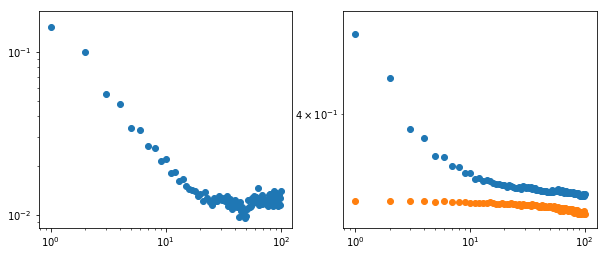

In [62]:
plot_decay(row.distances, row.MI, row.shuff_MI)

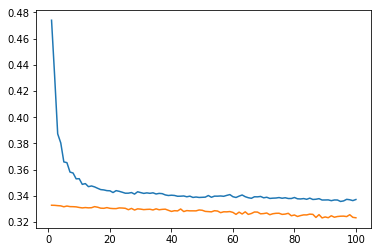

In [19]:
row = mi_df.iloc[0]
fig, ax = plt.subplots()
ax.plot(row.distances, row.MI)
ax.plot(row.distances, row.shuff_MI, alpha = 1)
#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.loglog(row.distances, row.shuff_MI)

In [11]:
row.MI-row.shuff_MI

array([0.14115093, 0.09891168, 0.05477569, 0.0479938 , 0.03422326,
       0.03311486, 0.02634845, 0.02569371, 0.02139875, 0.02194389,
       0.01795712, 0.0182922 , 0.01617168, 0.01659555, 0.01505428,
       0.01442662, 0.01416967, 0.01402293, 0.01296762, 0.01336891,
       0.01222391, 0.01371371, 0.01268032, 0.01205895, 0.01152071,
       0.01262127, 0.01209276, 0.01215519, 0.01304377, 0.01260001,
       0.01239411, 0.01258777, 0.01216407, 0.01307629, 0.01134458,
       0.01249561, 0.01198258, 0.01086791, 0.01129504, 0.0123636 ,
       0.01163038, 0.01118052, 0.00975679, 0.01189511, 0.01054609,
       0.01121654, 0.01023259, 0.01057909, 0.00954295, 0.00988002,
       0.01085485, 0.01226847, 0.01112344, 0.01112183, 0.01134463,
       0.01273696, 0.01181999, 0.01256518, 0.01294434, 0.01196252,
       0.01289237, 0.01221785, 0.01449428, 0.01154631, 0.0127272 ,
       0.01159402, 0.01161372, 0.01163276, 0.0132457 , 0.01202867,
       0.01201933, 0.01242446, 0.01188105, 0.01165987, 0.01196

In [7]:
age_cohorts = [[0.5, 1], [1, 1.5], [1.5, 2], [2, 2.5], [2.5, 3], [3, 20]]

full


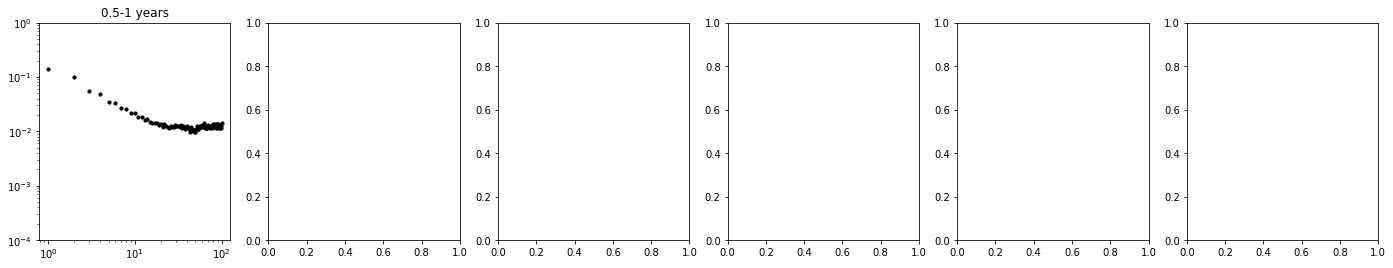

shuffled_between_words


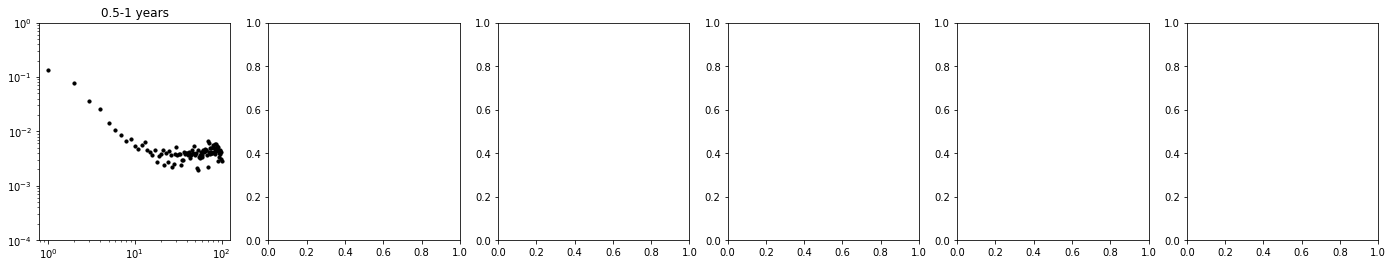

shuffled_within_words


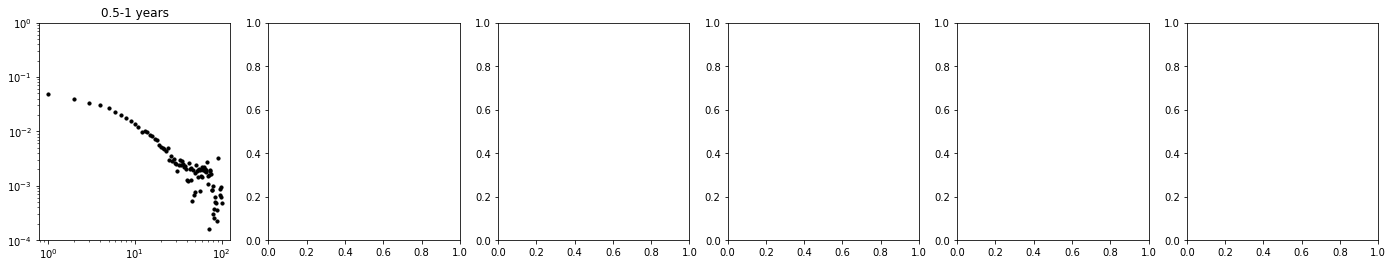

shuffled_within_utterance


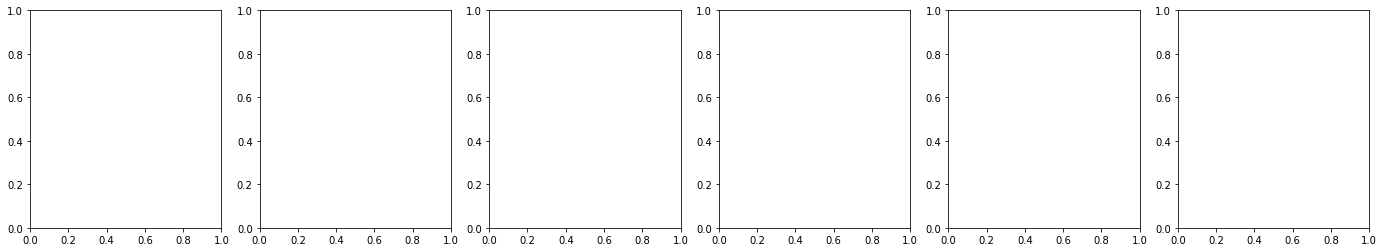

shuffled_between_utterance


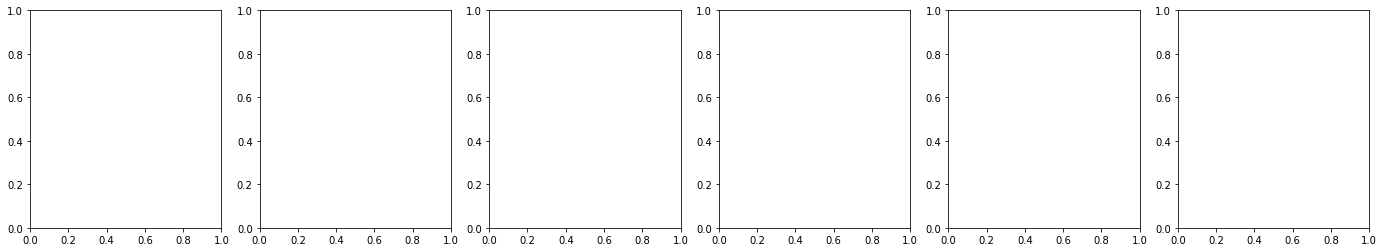

no_repeats


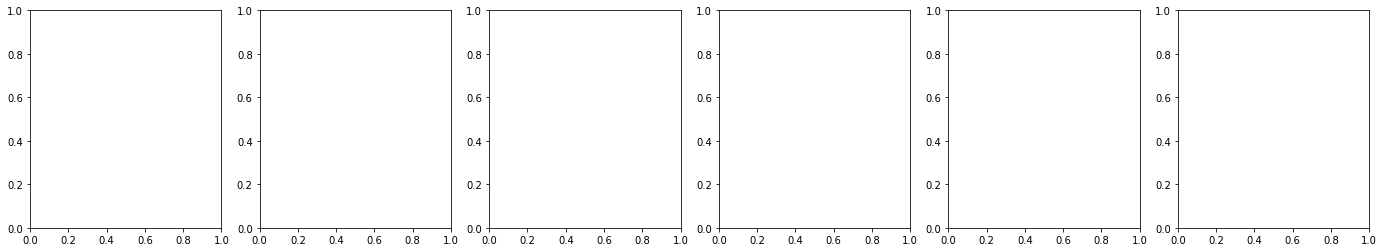

In [51]:
for shuff in ['full', 'shuffled_between_words', 'shuffled_within_words', 'shuffled_within_utterance', 'shuffled_between_utterance', 'no_repeats']:
    print(shuff)
    fig, axs = plt.subplots(ncols=len(age_cohorts), figsize=(4*len(age_cohorts),4))

    for axi, (idx, row) in enumerate(mi_df.iterrows()):
        if row.shuffling != shuff: 
            continue
        MI = row.MI-row.shuff_MI
        MI_var = row.MI_var
        #ax.scatter(distances, row.MI-row.shuff_MI)
        ax = axs[np.array([i[0] for i in age_cohorts]) == row.age_cohort_low][0]
        #ax.plot(distances, row.MI-row.shuff_MI, label = '{}-{} years'.format(row.age_cohort_low, row.age_cohort_high), lw=3)
        ax.scatter(row.distances, row.MI-row.shuff_MI, s=10, color='k')
        #ax.fill_between(row.distances, MI-MI_var, MI+MI_var, alpha = 0.25, color= 'k')
        #ax.legend()
        ax.set_title('{}-{} years'.format(row.age_cohort_low, row.age_cohort_high))
        ax.set_ylim([1e-4,1])
        #ax.set_xlim([1, 100])

        ax.set_yscale('log')
        ax.set_xscale('log')
    plt.show()